In [1]:
%matplotlib notebook

In [2]:
## WeatherPy
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
x = [1,2,3]
x[0] = 5
x

[5, 2, 3]

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [6]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url= f"{url}appid={weather_api_key}&units={cities}&q="

    city_url = url + "&q=" + city.replace(" ","+")
    
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bhawanigarh
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | flin flon
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | karratha
Processing Record 17 of Set 1 | kibaya
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | gat
Processing Record 21 of Set 1 | b

Processing Record 35 of Set 4 | vaini
Processing Record 36 of Set 4 | hellvik
Processing Record 37 of Set 4 | shalakusha
Processing Record 38 of Set 4 | forrest city
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | taman
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | palkino
Processing Record 45 of Set 4 | basco
Processing Record 46 of Set 4 | rajanpur
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | dingle
Processing Record 0 of Set 5 | jabiru
City not found. Skipping...
Processing Record 1 of Set 5 | acapulco
Processing Record 2 of Set 5 | milazzo
Processing Record 3 of Set 5 | coahuayana
Processing Record 4 of Set 5 | big bend
Processing Record 5 of Set 5 | calbuco
Processing Record 6 of Set 5 | sfantu gheorghe
Processing Record 7 of Set 5 | high level
Processing Record 8 of Set 5

Processing Record 21 of Set 8 | chaohu
Processing Record 22 of Set 8 | richards bay
Processing Record 23 of Set 8 | tete
Processing Record 24 of Set 8 | aquiraz
Processing Record 25 of Set 8 | ketchikan
Processing Record 26 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 27 of Set 8 | takaka
Processing Record 28 of Set 8 | balaipungut
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | bubaque
Processing Record 31 of Set 8 | erenhot
Processing Record 32 of Set 8 | bagh
Processing Record 33 of Set 8 | canutama
Processing Record 34 of Set 8 | shiyan
Processing Record 35 of Set 8 | sagauli
Processing Record 36 of Set 8 | kalmunai
Processing Record 37 of Set 8 | woodward
Processing Record 38 of Set 8 | oriximina
Processing Record 39 of Set 8 | la macarena
Processing Record 40 of Set 8 | wanxian
Processing Record 41 of Set 8 | cam ranh
Processing Record 42 of Set 8 | ksenyevka
City not found. Skipping...
Processing Record 43 of Set 8 | ornskoldsv

Processing Record 6 of Set 12 | burnie
Processing Record 7 of Set 12 | asadabad
Processing Record 8 of Set 12 | san fernando
Processing Record 9 of Set 12 | takoradi
Processing Record 10 of Set 12 | klaksvik
Processing Record 11 of Set 12 | labuan
Processing Record 12 of Set 12 | tiverton
Processing Record 13 of Set 12 | guerrero negro
Processing Record 14 of Set 12 | alice springs
Processing Record 15 of Set 12 | tuntum
Processing Record 16 of Set 12 | chamrajnagar
Processing Record 17 of Set 12 | de-kastri
Processing Record 18 of Set 12 | jalpa
Processing Record 19 of Set 12 | huilong
Processing Record 20 of Set 12 | pullman
Processing Record 21 of Set 12 | mutare
Processing Record 22 of Set 12 | sherbrooke
Processing Record 23 of Set 12 | pizarro
Processing Record 24 of Set 12 | normandin
Processing Record 25 of Set 12 | nemuro
Processing Record 26 of Set 12 | huaiyuan
Processing Record 27 of Set 12 | ancud
Processing Record 28 of Set 12 | saint-augustin
Processing Record 29 of Set 

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bhawanigarh,30.2667,76.0350,15.77,42,100,3.30,IN,1676853218
1,beringovskiy,63.0500,179.3167,-19.90,96,100,5.09,RU,1676852877
2,port alfred,-33.5906,26.8910,21.21,94,2,0.89,ZA,1676852717
3,nikolskoye,59.7035,30.7861,-8.44,96,96,2.18,RU,1676852756
4,kahului,20.8947,-156.4700,27.13,72,75,4.47,US,1676852783


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bhawanigarh,30.2667,76.0350,15.77,42,100,3.30,IN,1676853218
1,beringovskiy,63.0500,179.3167,-19.90,96,100,5.09,RU,1676852877
2,port alfred,-33.5906,26.8910,21.21,94,2,0.89,ZA,1676852717
3,nikolskoye,59.7035,30.7861,-8.44,96,96,2.18,RU,1676852756
4,kahului,20.8947,-156.4700,27.13,72,75,4.47,US,1676852783


In [24]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

<IPython.core.display.Javascript object>


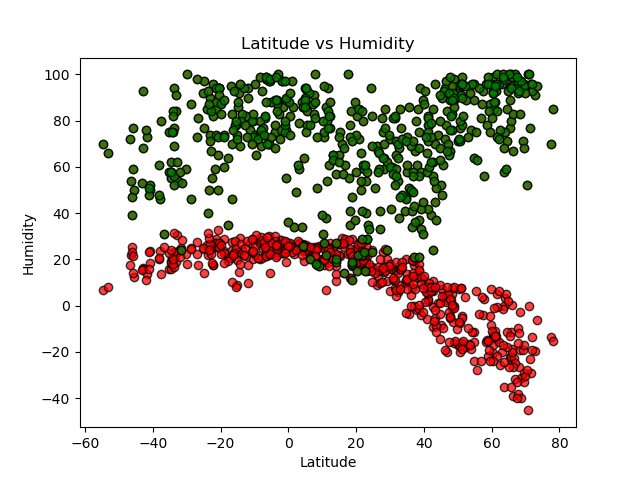

In [71]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

fig1 = plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, edgecolors="black",facecolors="red")


# Incorporate the other graph properties
# YOUR CODE HERE

fig1 = (plt.title('Latitude vs Temperature'), plt.xlabel("Latitude"), plt.ylabel("Temperature"))

# Save the figure
fig1 = plt.savefig("output_data/Fig1.png")

# Show plot
fig1 = plt.show()

In [53]:
#### Latitude Vs. Humidity

In [73]:
# Build scatter plot for latitude vs. Humidity
# YOUR CODE HERE

fig2 = plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, edgecolors="black",facecolors="green")


# Incorporate the other graph properties
# YOUR CODE HERE

fig2 = (plt.title('Latitude vs Humidity'), plt.xlabel("Latitude"), plt.ylabel("Humidity"))

# Save the figure
fig2 = plt.savefig("output_data/Fig2.png")

# Show plot
fig2 = plt.show()

In [34]:
#### Latitude Vs. Cloudiness


In [35]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [36]:
#### Latitude vs. Wind Speed Plot

In [37]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [38]:
## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

In [ ]:
###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE